In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/cybersecurity_intrusion_data.csv")

In [ ]:
print(df.shape)


(9537, 11)


In [ ]:
print(df.columns)


Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')


In [ ]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
None
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472       

In [ ]:
# Check for missing values
print(df.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


In [ ]:
# Fill missing values in encryption_used with mode
df['encryption_used'].fillna(df['encryption_used'].mode()[0], inplace=True)


<ipython-input-9-cf9437d05677>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['encryption_used'].fillna(df['encryption_used'].mode()[0], inplace=True)


In [ ]:
# Check for missing values
print(df.isnull().sum())

session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']

# Encode categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Now, all categorical columns are converted into numerical values


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['attack_detected', 'session_id'])  # Drop session_id as it's not useful
y = df['attack_detected']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(type(X_test))  # Check if X_test exists and its type
print(X_test.shape)  # Check number of rows & columns


<class 'numpy.ndarray'>
(1908, 9)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [ ]:
# Evaluate Model
accuracy = accuracy_score(y_test, rf_preds)
print(" Random Forest Accuracy:", accuracy)

# Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, rf_preds))


 Random Forest Accuracy: 0.8841719077568134
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90      1055
           1       0.99      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



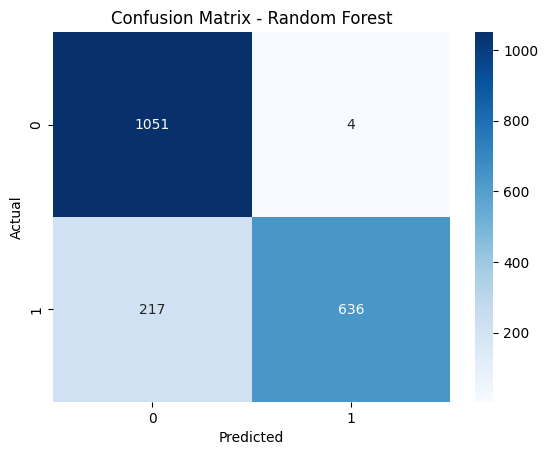

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


attack_detected
0    5273
1    4264
Name: count, dtype: int64


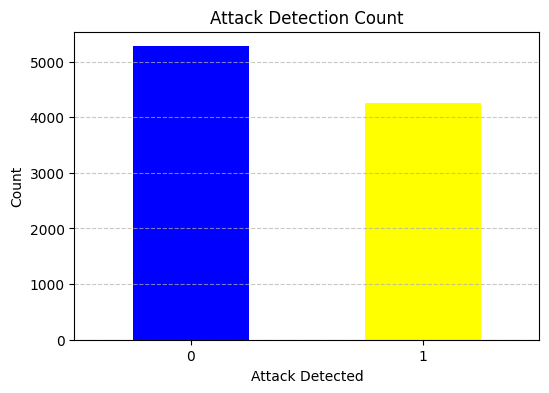

In [ ]:
attack_counts = df.attack_detected.value_counts()
print(attack_counts)

plt.figure(figsize=(6,4))
attack_counts.plot(kind='bar', color=['blue', 'yellow'])
plt.xlabel("Attack Detected")
plt.ylabel("Count")
plt.title("Attack Detection Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

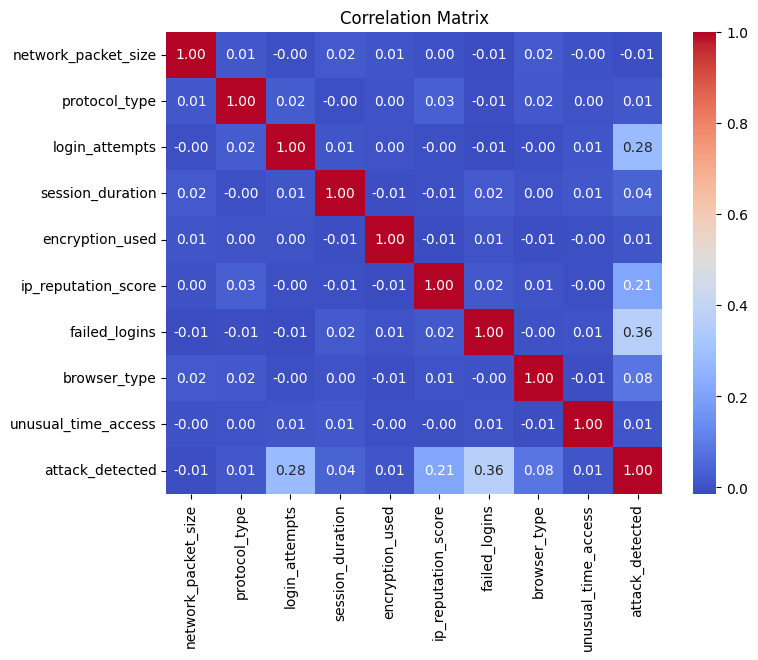

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Hyperparameter Tuning

In [ ]:
best_rf = RandomForestClassifier(
    n_estimators=1500,  # Increase trees for better learning
    max_depth=70,  # Allow deeper trees for complex patterns
    min_samples_split=3,  # Reduce min split size to learn more variations
    min_samples_leaf=1,  # Allow smaller leaves for more flexibility
    class_weight={0:1, 1:6},  # Increase attack weight for better recall
    bootstrap=True,  # Enables bagging to prevent overfitting
    random_state=42
)

best_rf.fit(X_train_selected, y_train)
rf_preds_final = best_rf.predict(X_test_selected)

# Evaluate model
print("Final Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_preds_final))
print("Classification Report:\n", classification_report(y_test, rf_preds_final))


NameError: name 'X_train_selected' is not defined

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define SVM model with class weights to handle imbalance
svm_model = SVC(kernel='rbf', C=1.5, gamma='scale', class_weight={0:1, 1:6}, probability=True, random_state=42)

# Train SVM
svm_model.fit(X_train_selected, y_train)

# Predict
svm_preds = svm_model.predict(X_test_selected)

# Evaluate SVM
print(" SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))


 SVM Accuracy: 0.5529350104821803
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.23      0.37      1055
           1       0.50      0.95      0.65       853

    accuracy                           0.55      1908
   macro avg       0.67      0.59      0.51      1908
weighted avg       0.69      0.55      0.50      1908



<ipython-input-49-f9f98583dfef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


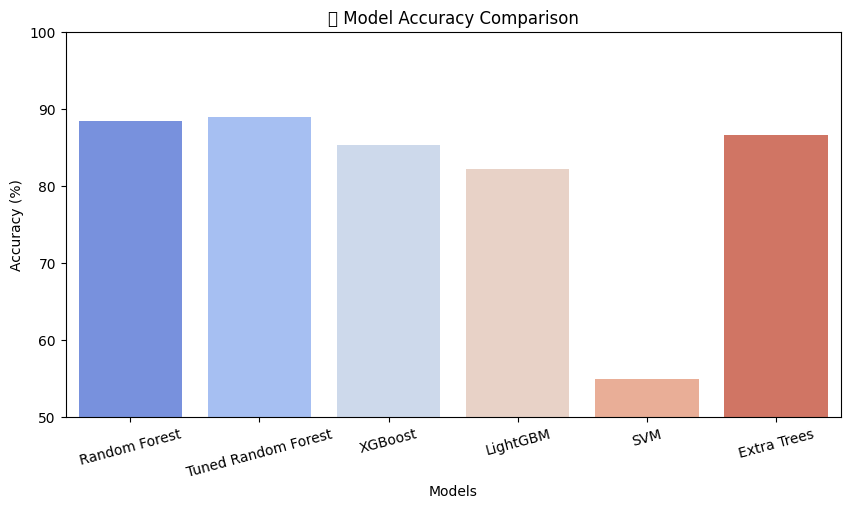

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ["Random Forest", "Tuned Random Forest", "XGBoost", "LightGBM", "SVM", "Extra Trees"]

# Corresponding accuracy values (Replace with your actual values)
accuracy_scores = [88.5, 89.0, 85.4, 82.3, 55.0, 86.7]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracy_scores, palette="coolwarm")

# Labels & Title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("📊 Model Accuracy Comparison")
plt.ylim(50, 100)  # Adjust limits for better visibility
plt.xticks(rotation=15)  # Rotate labels for clarity

# Show plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select features & target
X = df.drop(columns=['session_id', 'attack_detected'])  # Remove ID & target
y = df['attack_detected']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['protocol_type', 'browser_type', 'encryption_used'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP Model
mlp_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile Model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f" MLP Accuracy: {accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6900 - loss: 0.5981 - val_accuracy: 0.8024 - val_loss: 0.4636
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.4572 - val_accuracy: 0.8491 - val_loss: 0.3975
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8515 - loss: 0.3871 - val_accuracy: 0.8684 - val_loss: 0.3653
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.3551 - val_accuracy: 0.8800 - val_loss: 0.3518
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8725 - loss: 0.3459 - val_accuracy: 0.8758 - val_loss: 0.3404
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8783 - loss: 0.3316 - val_accuracy: 0.8679 - val_loss: 0.3344
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8893 - loss: 0.3107 - val_accuracy: 0.8810 - val_loss: 0.3250
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8807 - loss: 0.3187 - val_accuracy: 0.8774 - val_

Save the Trained Model

In [ ]:
# Save model as HDF5 format
mlp_model.save("mlp_model.h5")
print(" Model saved successfully!")


 Model saved successfully!


Load the Saved Model

In [ ]:
# Load the saved model
loaded_model = keras.models.load_model("mlp_model.h5")
print(" Model loaded successfully!")


 Model loaded successfully!


Take User Input & Predict

In [ ]:
normal_sample = test_data[test_data["attack_detected"] == 0].head(1)  # Select one normal row
print(normal_sample)


   network_packet_size  protocol_type  login_attempts  session_duration  \
8             0.512022      -2.325895        0.493102          -0.60849   

   encryption_used  ip_reputation_score  failed_logins  browser_type  \
8        -0.655291            -0.238605      -0.500779     -0.777742   

   unusual_time_access  attack_detected  
8            -0.419989              0.0  


In [ ]:
# Reorder user input columns to match training features
user_df = user_df[X.columns]  # Ensure same order as training data


NameError: name 'user_df' is not defined

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras

# Load model & scaler
loaded_model = keras.models.load_model("mlp_model.h5")
scaler = StandardScaler()
scaler.fit(X)  # Reuse the scaler trained on full dataset

# Example user input
user_input = {
    "network_packet_size": 0.512022,
    "protocol_type": "-2.325895",
    "login_attempts": 0.493102,
    "session_duration": -0.60849,
    "encryption_used": "-0.655291",
    "ip_reputation_score": -0.238605,
    "failed_logins": -0.500779,
    "browser_type": "-0.777742",
    "unusual_time_access": -0.419989
}

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# One-hot encode categorical features (same as training)
user_df = pd.get_dummies(user_df, columns=['protocol_type', 'browser_type', 'encryption_used'], drop_first=True)

# Add missing columns & Reorder to match training features
missing_cols = set(X.columns) - set(user_df.columns)
for col in missing_cols:
    user_df[col] = 0  # Fill missing columns with 0

user_df = user_df[X.columns]  # Ensure same order as training data

# Scale user input
user_scaled = scaler.transform(user_df)

# Predict using loaded model
prediction = loaded_model.predict(user_scaled)
prediction_label = (prediction > 0.5).astype(int)[0][0]  # Convert to 0 or 1

# Print Result
if prediction_label == 1:
    print(" Attack Detected")
else:
    print("Normal Traffic")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Normal Traffic


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model (if not done already)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
import pickle

# Save the trained model to a file
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the saved model
with open("random_forest_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Predict on test data
predictions = loaded_model.predict(X_test)

print(predictions[:10])  # Show first 10 predictions


[0 0 1 0 0 0 0 1 0 0]
